In [6]:
import pandas as pd
import numpy as np

resourcePath = '../resources/6장/'
iris = pd.read_csv(resourcePath + 'iris.csv')
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# iris.info()
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
count = pd.DataFrame(iris['Species'].value_counts())
count

,count
Species,
setosa,50
versicolor,50
virginica,50


In [20]:
# 1. 원본 데이터 확인 (분석)
# 2. 데이터 전처리/가공 : 이상치/결측치, 컬럼 조정
# 3. 데이터 분석(통계)/가시화(그래프, 차트) -> 경영진 제공
iris.isnull().sum()


SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [21]:
iris.duplicated().sum()

## 완전히 중복되는 2개의 행이 있다. (1개의 행이 중복)

np.int64(1)

In [26]:
index = iris.duplicated()
iris.loc[index, :]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
142,5.8,2.7,5.1,1.9,virginica


In [35]:
result = (iris['SepalLength'] == 5.8) & (iris['PetalWidth'] == 1.9)
iris.loc[result, :]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
101,5.8,2.7,5.1,1.9,virginica


In [37]:
# 중복 데이터 삭제
iris = iris.drop_duplicates()
result = (iris['SepalLength'] == 5.8) & (iris['PetalWidth'] == 1.9)
iris.loc[result, :]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
101,5.8,2.7,5.1,1.9,virginica


In [39]:
iris.groupby('Species').mean()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,5.006000,3.428000,1.462000,0.246000
versicolor,5.936000,2.770000,4.260000,1.326000
virginica,6.604082,2.979592,5.561224,2.028571


In [41]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install koreanize_matplotlib

   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.9 MB 4.2 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/7.9 MB 3.7 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/7.9 MB 3.7 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/7.9 MB 3.6 MB/s eta 0:00:02
   ----------------- ---------------------- 3.4/7.9 MB 3.7 MB/s eta 0:00:02
   --------------------- ------------------ 4.2/7.9 MB 3.6 MB/s eta 0:00:02
   ------------------------- -------------- 5.0/7.9 MB 3.6 MB/s eta 0:00:01
   ----------------------------- ---------- 5.8/7.9 MB 3.6 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/7.9 MB 3.6 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/7.9 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 7.9/7.9 MB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


<>:6: SyntaxWarning: invalid escape sequence '\W'
<>:6: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5364\4060731575.py:6: SyntaxWarning: invalid escape sequence '\W'
  font_path = "C:\Windows\Fonts\gulim.ttc"  # 나눔고딕 폰트 경로


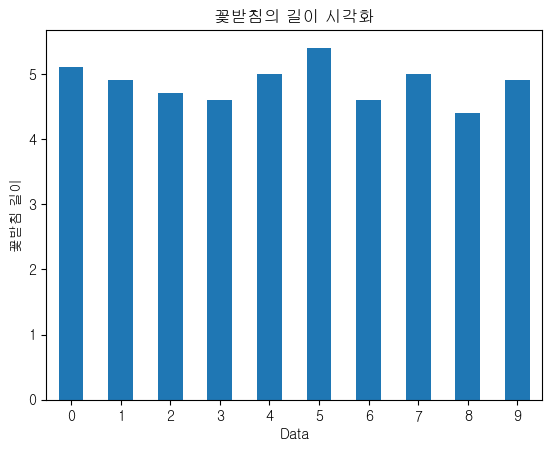

In [51]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

# 1. Windows 폰트 경로 설정
font_path = "C:\Windows\Fonts\gulim.ttc"  # 나눔고딕 폰트 경로
font_prop = fm.FontProperties(fname=font_path)  # 폰트 속성 설정

# 2. matplotlib에 폰트 적용
plt.rc("font", family=font_prop.get_name())  # 나눔고딕 폰트 이름 적용

iris["SepalLength"][:10].plot(kind="bar", rot=0)
plt.title("꽃받침의 길이 시각화")
plt.xlabel("Data")
plt.ylabel("꽃받침 길이")
plt.show()

In [53]:
df2 =   iris.groupby(iris['Species']).mean()
df2

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,5.006000,3.428000,1.462000,0.246000
versicolor,5.936000,2.770000,4.260000,1.326000
virginica,6.604082,2.979592,5.561224,2.028571


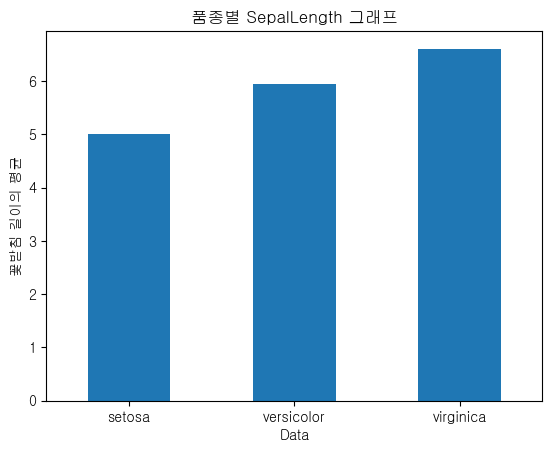

In [55]:
df2.SepalLength[:].plot(kind='bar', rot=0)
plt.title('품종별 SepalLength 그래프')
plt.xlabel('Data')
plt.ylabel('꽃받침 길이의 평균')
plt.show()

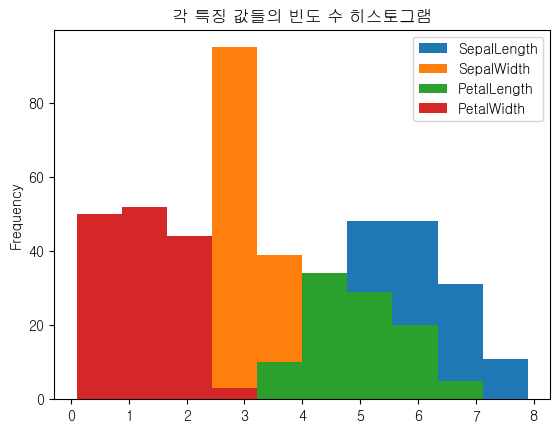

In [58]:
iris.plot(kind='hist')
plt.title('각 특징 값들의 빈도 수 히스토그램')
plt.show()

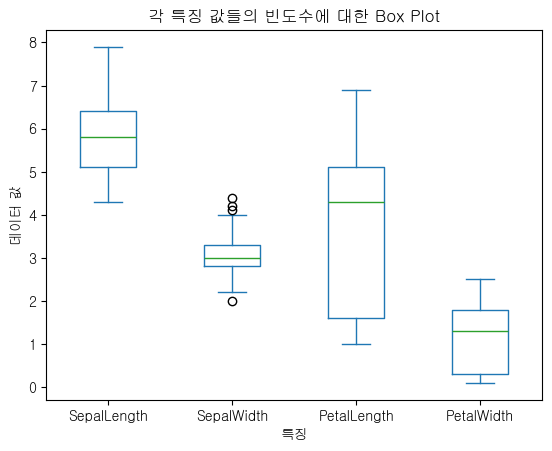

In [60]:
iris.plot(kind='box')
plt.title('각 특징 값들의 빈도수에 대한 Box Plot')
plt.xlabel('특징')
plt.ylabel('데이터 값')
plt.show()

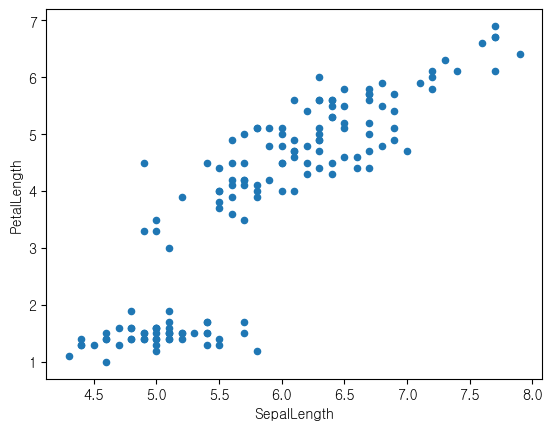

In [63]:
iris.plot(kind='scatter', y='PetalLength', x='SepalLength')
plt.show()